In [1]:
import json
import numpy as np
from Necessary_functions import *

au_to_wn = 219474.602894

file_name = "LiH_data_qedfci_pqed_pqed_minimal.json"
# Load the molecule data from the JSON file
with open(file_name, 'r') as json_file:
    molecule_data = json.load(json_file)



# Extract values from the loaded JSON data into Python variables
molecule_name = molecule_data["molecule_data"]["molecule_name"]
mA_au = molecule_data["molecule_data"]["mA_au"]
mB_au = molecule_data["molecule_data"]["mB_au"]
mu_au = molecule_data["molecule_data"]["mu_au"]
bondlength_scan_vals = np.array(molecule_data["molecule_data"]["bondlength_scan_vals"])
omega = molecule_data["molecule_data"]["omega"]
CI_Level = molecule_data["molecule_data"]["CI_Level"]
n_photon_basis_states = molecule_data["molecule_data"]["n_photon_basis_states"]
basis_set = molecule_data["molecule_data"]["basis_set"]
lambda_values = np.array(molecule_data["lambda_values"])

ci_info = molecule_data["molecule_data"]["ci_info"]
qed_ci = np.array(molecule_data["qed-ci"])
ci_lp_index = ci_info["lower_polariton_index"]
ci_up_index = ci_info["upper_polariton_index"]

# Print the extracted variables
print("Molecule Name:", molecule_name)
print("Mass A (au):", mA_au)
print("Mass B (au):", mB_au)
print("Reduced Mass (mu_au):", mu_au)
print("Bond Length Scan Values:", bondlength_scan_vals)
print("Omega:", omega)
print("CI Level:", CI_Level)
print("Number of Photon Basis States:", n_photon_basis_states)
print("Basis Set:", basis_set)
print("Lambda Values:", lambda_values)




print(qed_ci.shape)

Molecule Name: LiH
Mass A (au): 1837.1527318119486
Mass B (au): 12789.392453521119
Reduced Mass (mu_au): 1606.3989812004538
Bond Length Scan Values: [1.         1.02525253 1.05050505 1.07575758 1.1010101  1.12626263
 1.15151515 1.17676768 1.2020202  1.22727273 1.25252525 1.27777778
 1.3030303  1.32828283 1.35353535 1.37878788 1.4040404  1.42929293
 1.45454545 1.47979798 1.50505051 1.53030303 1.55555556 1.58080808
 1.60606061 1.63131313 1.65656566 1.68181818 1.70707071 1.73232323
 1.75757576 1.78282828 1.80808081 1.83333333 1.85858586 1.88383838
 1.90909091 1.93434343 1.95959596 1.98484848 2.01010101 2.03535354
 2.06060606 2.08585859 2.11111111 2.13636364 2.16161616 2.18686869
 2.21212121 2.23737374 2.26262626 2.28787879 2.31313131 2.33838384
 2.36363636 2.38888889 2.41414141 2.43939394 2.46464646 2.48989899
 2.51515152 2.54040404 2.56565657 2.59090909 2.61616162 2.64141414
 2.66666667 2.69191919 2.71717172 2.74242424 2.76767677 2.79292929
 2.81818182 2.84343434 2.86868687 2.89393939 2.

In [2]:

ci_coupling_strengths = np.array([0.0, 0.01, 0.05, 0.1])

indices = [i for i, val in enumerate(lambda_values)
           if np.any(np.isclose(val, ci_coupling_strengths))]

print(indices) 

lambda_values = lambda_values[indices]

print(lambda_values)
print(omega)

[0, 4, 9]
[0.01 0.05 0.1 ]
0.12086


LiH


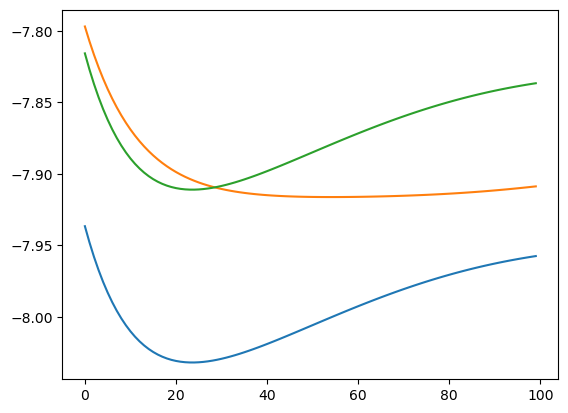

In [3]:


with open("Uncoupled_molecules_data.json", 'r') as json_file:
    molecule_data_uncoupled_1_photon = json.load(json_file)
molecule_name = file_name.split('_')[0]
print(molecule_name)
molecule_data_uncoupled_1_photon = np.array(molecule_data_uncoupled_1_photon[molecule_name]["Uncoupled_Surfaces"])
plt.plot(molecule_data_uncoupled_1_photon)

#fit in the data into pqed minimal, pqed , qed-ci, 

no_coupling_qed_ci= np.zeros_like(qed_ci[0])
no_coupling_qed_ci[:, 0] = molecule_data_uncoupled_1_photon[:, 0]
no_coupling_qed_ci[:, ci_up_index] = molecule_data_uncoupled_1_photon[:, 1]
no_coupling_qed_ci[:, ci_lp_index] = molecule_data_uncoupled_1_photon[:, 2]

qed_ci= qed_ci.tolist()
qed_ci.insert(0, no_coupling_qed_ci.tolist())  
qed_ci= np.array(qed_ci)



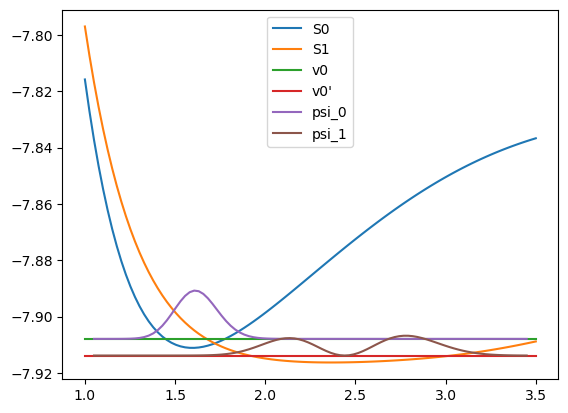

-0.01378925874126094
omega_0 on S0: 0.006229132115425529 a.u.
omega_0 on S1: 0.001650922077923056 a.u.
omega_0 on S0: 1367.1362974072802 cm^-1
omega_0 on S1: 362.33546746110005 cm^-1
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.006229132115425529
S second way  10.561547068412935
Huang-Rhys factor for S0->S1 is 10.561547068412935


In [4]:
# get bond lengths in bohr
bondlength_scan_vals_bohr = bondlength_scan_vals / 0.52917721067

fac = 5
# store S0 and S1 surfaces as numpy arrays
S0_surf = np.array(qed_ci[0][:,0])
S1_surf = np.array(qed_ci[0][:,2])

# plot s0 and s1 surfaces
plt.plot(bondlength_scan_vals, S0_surf+omega, label="S0")
plt.plot(bondlength_scan_vals, S1_surf, label="S1")

# get vibrational states on S0 surface
S0_vals, S0_vecs = get_fd_wfn(bondlength_scan_vals_bohr, S0_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on S1 surface
S1_vals, S1_vecs = get_fd_wfn(bondlength_scan_vals_bohr, S1_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)


S0_v0_line = S0_vals[0] * np.ones(bondlength_scan_vals.shape[0])
S1_v0_line = S1_vals[1] * np.ones(bondlength_scan_vals.shape[0])

S0_v0_func = S0_v0_line[2:-2]+omega + S0_vecs[:,0] ** 2 / fac 
S1_v0_func = S1_v0_line[2:-2] + S1_vecs[:,1] ** 2 / fac 

plt.plot(bondlength_scan_vals, S0_v0_line+omega, label="v0")
plt.plot(bondlength_scan_vals, S1_v0_line, label="v0'")
plt.plot(bondlength_scan_vals[2:-2], S0_v0_func, label="psi_0")
plt.plot(bondlength_scan_vals[2:-2], S1_v0_func, label="psi_1")
#plt.xlim(1.2,2.5)
#plt.ylim(-199.805,-199.70)
plt.legend()
plt.show()

print(S1_vals[0]-S0_vals[1] - omega)

print(F"omega_0 on S0: {(S0_vals[1]-S0_vals[0])} a.u.")
print(F"omega_0 on S1: {(S1_vals[1]-S1_vals[0])} a.u.")
print(F"omega_0 on S0: {(S0_vals[1]-S0_vals[0]) * 219474.602894} cm^-1")
print(F"omega_0 on S1: {(S1_vals[1]-S1_vals[0]) * 219474.602894} cm^-1")

#calculate Huang Rhys and FC limit between S0 and S1
fcf_s0_s1 = get_fcf_matrix(S0_surf, S1_surf, r_data = bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
HR_s0_s1 = calculate_HR(S0_surf, S1_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)

print(F"Huang-Rhys factor for S0->S1 is {HR_s0_s1}")


In [5]:
print(np.shape(qed_ci))
print(indices)

(11, 100, 10)
[0, 4, 9]


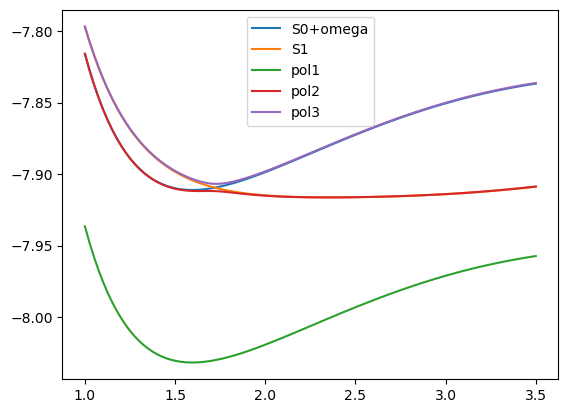

omega_0 on pol1: 0.006231697094568389 a.u.
omega_0 on pol2: 0.001605895476021857 a.u.
omega_0 on pol3: 0.006938445132212756 a.u.
omega_0 on pol4: 0.001650922077923056 a.u.
omega_0 on pol1: 1367.6992451860908 cm^-1
omega_0 on pol2: 352.45327188916815 cm^-1
omega_0 on pol3: 1522.812490094202 cm^-1
omega_0 on pol4: 362.33546746110005 cm^-1
S second way  10.014912366268998
S second way  0.3183404808782146
S second way  10.574487917934091
Huang-Rhys factor for pol1->pol2 is 10.014912366268998
Huang-Rhys factor for pol1->pol3 is 0.3183404808782146
Huang-Rhys factor for pol1->pol4 is 10.574487917934091


In [6]:


fac = 5

# store S0 and S1 surfaces as numpy arrays
pol1_surf = np.array(qed_ci[indices[0]+1][:,0])
pol2_surf = np.array(qed_ci[indices[0]+1][:,ci_lp_index])
pol3_surf = np.array(qed_ci[indices[0]+1][:,ci_up_index])
pol4_surf = np.array(qed_ci[indices[0]+1][:,ci_up_index+2])

# plot s0 and s1 surfaces
plt.plot(bondlength_scan_vals, S0_surf+omega, label="S0+omega")
plt.plot(bondlength_scan_vals, S1_surf, label="S1")
plt.plot(bondlength_scan_vals, pol1_surf, label="pol1")
plt.plot(bondlength_scan_vals, pol2_surf, label="pol2")
plt.plot(bondlength_scan_vals, pol3_surf, label="pol3")


#plt.xlim(1.2,2.5)
#plt.ylim(-199.805,-199.70)
plt.legend()
plt.show()



# get vibrational states on pol1 surf
pol1_vals, pol1_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol1_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol2 surf
pol2_vals, pol2_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol2_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol1 surf
pol3_vals, pol3_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol3_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# we will take pol4 to be equivalent to S1 + omega
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0])} a.u.")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0])} a.u.")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0])} a.u.")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0])} a.u.")
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0]) * au_to_wn} cm^-1")


HR_pol1_pol2 = calculate_HR( pol1_surf,  pol2_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol3 = calculate_HR( pol1_surf,  pol3_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol4 = calculate_HR( pol1_surf,  S1_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)

print(F"Huang-Rhys factor for pol1->pol2 is {HR_pol1_pol2}")
print(F"Huang-Rhys factor for pol1->pol3 is {HR_pol1_pol3}")
print(F"Huang-Rhys factor for pol1->pol4 is {HR_pol1_pol4}")

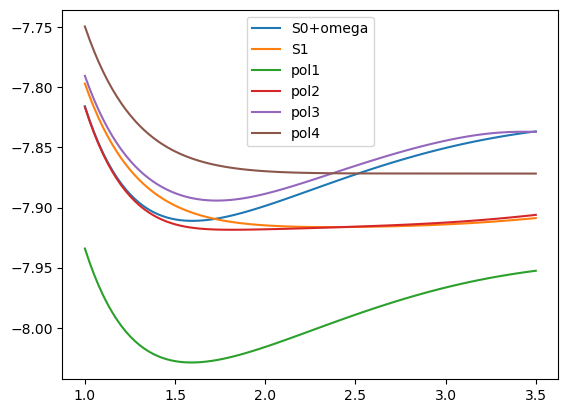

omega_0 on pol1: 0.006292022155735211 a.u.
omega_0 on pol2: 0.0019347379606289294 a.u.
omega_0 on pol3: 0.005663559738974477 a.u.
omega_0 on pol4: 0.001650922077923056 a.u.
omega_0 on pol1: 1380.9390640302352 cm^-1
omega_0 on pol2: 424.6258456129817 cm^-1
omega_0 on pol3: 1243.0075246778697 cm^-1
omega_0 on pol4: 362.33546746110005 cm^-1
S second way  0.9088012470215954
S second way  0.3569809601917142
S second way  10.798674045799345
Huang-Rhys factor for pol1->pol2 is 0.9088012470215954
Huang-Rhys factor for pol1->pol3 is 0.3569809601917142
Huang-Rhys factor for pol1->pol4 is 10.798674045799345


In [12]:
### lambda = 0.05

fac = 5

# store S0 and S1 surfaces as numpy arrays
pol1_surf = np.array(qed_ci[indices[1]+1][:,0])
pol2_surf = np.array(qed_ci[indices[1]+1][:,ci_lp_index])
pol3_surf = np.array(qed_ci[indices[1]+1][:,ci_up_index])
pol4_surf = np.array(qed_ci[indices[1]+1][:,ci_up_index+2])

# plot s0 and s1 surfaces
plt.plot(bondlength_scan_vals, S0_surf+omega, label="S0+omega")
plt.plot(bondlength_scan_vals, S1_surf, label="S1")
plt.plot(bondlength_scan_vals, pol1_surf, label="pol1")
plt.plot(bondlength_scan_vals, pol2_surf, label="pol2")
plt.plot(bondlength_scan_vals, pol3_surf, label="pol3")
plt.plot(bondlength_scan_vals, pol4_surf, label="pol4")


#plt.xlim(1.2,2.5)
#plt.ylim(-199.805,-199.70)
plt.legend()
plt.show()



# get vibrational states on pol1 surf
pol1_vals, pol1_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol1_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol2 surf
pol2_vals, pol2_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol2_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol1 surf
pol3_vals, pol3_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol3_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# we will take pol4 to be equivalent to S1 + omega
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0])} a.u.")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0])} a.u.")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0])} a.u.")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0])} a.u.")
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0]) * au_to_wn} cm^-1")


HR_pol1_pol2 = calculate_HR( pol1_surf,  pol2_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol3 = calculate_HR( pol1_surf,  pol3_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol4 = calculate_HR( pol1_surf,  S1_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)

print(F"Huang-Rhys factor for pol1->pol2 is {HR_pol1_pol2}")
print(F"Huang-Rhys factor for pol1->pol3 is {HR_pol1_pol3}")
print(F"Huang-Rhys factor for pol1->pol4 is {HR_pol1_pol4}")

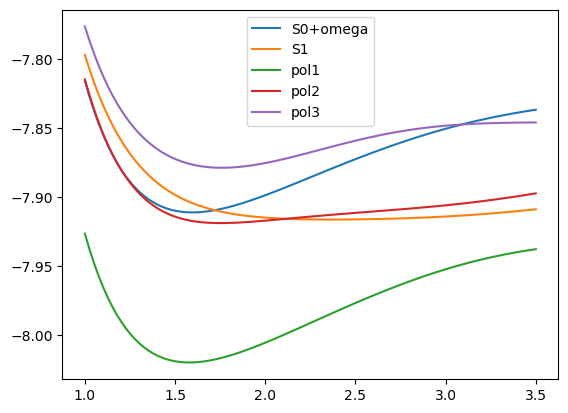

omega_0 on pol1: 0.006465304303819863 a.u.
omega_0 on pol2: 0.003342081183620671 a.u.
omega_0 on pol3: 0.0049069391286220565 a.u.
omega_0 on pol4: 0.001650922077923056 a.u.
omega_0 on pol1: 1418.9700946697337 cm^-1
omega_0 on pol2: 733.5019406146563 cm^-1
omega_0 on pol3: 1076.9485166793563 cm^-1
omega_0 on pol4: 362.33546746110005 cm^-1
S second way  0.5579621249364898
S second way  0.6051658746766738
S second way  11.4485187571629
Huang-Rhys factor for pol1->pol2 is 0.5579621249364898
Huang-Rhys factor for pol1->pol3 is 0.6051658746766738
Huang-Rhys factor for pol1->pol4 is 11.4485187571629


In [9]:
### lambda = 0.05

fac = 5

# store S0 and S1 surfaces as numpy arrays
pol1_surf = np.array(qed_ci[indices[2]+1][:,0])
pol2_surf = np.array(qed_ci[indices[2]+1][:,ci_lp_index])
pol3_surf = np.array(qed_ci[indices[2]+1][:,ci_up_index])
pol4_surf = np.array(qed_ci[indices[2]+1][:,ci_up_index+2])

# plot s0 and s1 surfaces
plt.plot(bondlength_scan_vals, S0_surf+omega, label="S0+omega")
plt.plot(bondlength_scan_vals, S1_surf, label="S1")
plt.plot(bondlength_scan_vals, pol1_surf, label="pol1")
plt.plot(bondlength_scan_vals, pol2_surf, label="pol2")
plt.plot(bondlength_scan_vals, pol3_surf, label="pol3")


#plt.xlim(1.2,2.5)
#plt.ylim(-199.805,-199.70)
plt.legend()
plt.show()



# get vibrational states on pol1 surf
pol1_vals, pol1_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol1_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol2 surf
pol2_vals, pol2_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol2_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# get vibrational states on pol1 surf
pol3_vals, pol3_vecs = get_fd_wfn(bondlength_scan_vals_bohr, pol3_surf, use_5_point_stencil=True, N=bondlength_scan_vals.shape[0], mu_au=mu_au)

# we will take pol4 to be equivalent to S1 + omega
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0])} a.u.")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0])} a.u.")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0])} a.u.")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0])} a.u.")
print(F"omega_0 on pol1: {(pol1_vals[1]-pol1_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol2: {(pol2_vals[1]-pol2_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol3: {(pol3_vals[1]-pol3_vals[0]) * au_to_wn} cm^-1")
print(F"omega_0 on pol4: {(S1_vals[1]-S1_vals[0]) * au_to_wn} cm^-1")


HR_pol1_pol2 = calculate_HR( pol1_surf,  pol2_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol3 = calculate_HR( pol1_surf,  pol3_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)
HR_pol1_pol4 = calculate_HR( pol1_surf,  S1_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)

print(F"Huang-Rhys factor for pol1->pol2 is {HR_pol1_pol2}")
print(F"Huang-Rhys factor for pol1->pol3 is {HR_pol1_pol3}")
print(F"Huang-Rhys factor for pol1->pol4 is {HR_pol1_pol4}")

In [11]:
#calculate Huang Rhys and FC limit between S0 and S1
fcf_s0_s1 = get_fcf_matrix(S0_surf, S1_surf, r_data = bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
HR_s0_s1 = calculate_HR(S0_surf, S1_surf,  r_data_ang =   bondlength_scan_vals, mu_au=mu_au)

print(F"Huang-Rhys factor for S0->S1 is {HR_s0_s1}")

IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.006229132115425529
S second way  10.561547068412935
Huang-Rhys factor for S0->S1 is 10.561547068412935


In [9]:

np.set_printoptions(precision = 3)
fcf_limit_s0_lp = []
fcf_limit_s0_up = []


HRs_S0_lp =[]
HRs_S0_up = []


index_pes = 0


for lambda_val in lambda_values:


    #s0 to LP
    fcf_s0_lp = get_fcf_matrix(casscf[index_pes][:,  0 ], casscf[index_pes][:, casscf_lp_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )
    fcf_s0_up = get_fcf_matrix(casscf[index_pes][:,  0 ], casscf[index_pes][:, casscf_up_index ],  r_data=   bondlength_scan_vals, N=bondlength_scan_vals.shape[0], num_matrix_elements=10, mu_au=mu_au , plot=False   )

    fcf_limit_s0_lp_casscf.append(fcf_s0_lp[0,0])
    fcf_limit_s0_up_casscf.append(fcf_s0_up[0,0])



    #s0 to LP
    HRs_S0_lp_casscf.append(calculate_HR(casscf[index_pes][:,  0 ], casscf[index_pes][:, casscf_lp_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))
    HRs_S0_up_casscf.append(calculate_HR(casscf[index_pes][:,  0 ], casscf[index_pes][:, casscf_up_index ],  r_data_ang =   bondlength_scan_vals, mu_au=mu_au))


    index_pes+=1


fcf_limit_s0_lp_casscf = np.array(fcf_limit_s0_lp_casscf)
fcf_limit_s0_up_casscf=np.array(fcf_limit_s0_up_casscf)

HRs_S0_lp_casscf =np.array(HRs_S0_lp_casscf )
HRs_S0_up_casscf = np.array(HRs_S0_up_casscf)


print(fcf_limit_s0_lp_casscf)



IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.00711120384954711
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.00711120384954711
S second way  0.0
S second way  2.5647561001263135
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.007131169805091986
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.007131169805091986
S second way  0.0007104799360275353
S second way  1.9499801624461575
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.007198302779443111
IN GET_FCF_MATRIX
Getting fundamental Frequency
Fundamental frequency: 0.007198302779443111
S second way  0.16256038602472728
S second way  0.8757445253633404
[1.    0.998 0.84 ]


In [ ]:
# prompt: I want to create a bar graph of the Franck-Condon limit data shown above against the field coupling strength.  I would like each data set of the Franck-Condon limits to be represented by a separate bar with a distinct shadded color and label.


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"
CASSCFCOLOUR = "orange"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_lp_pqed_minimal[indices]

# Franck-Condon limits between ground- and lower-polariton states from  exact calculation - QED-CASSCF
fcl_qedcasscf = fcf_limit_s0_lp_casscf[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]




# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-CI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_qedcasscf, color=CASSCFCOLOUR, width=barWidth, edgecolor='white', label='QEDCASSCF')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()


# prompt: I want to create a bar graph of the Franck-Condon limit data shown above against the field coupling strength.  I would like each data set of the Franck-Condon limits to be represented by a separate bar with a distinct shadded color and label.


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05]


# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
fcl_qedci = fcf_limit_s0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed = fcf_limit_s0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
fcl_pqed_minimal = fcf_limit_s0_up_pqed_minimal[indices]

# Franck-Condon limits between ground- and lower-polariton states from  exact calculation - QED-CASSCF
fcl_qedcasscf = fcf_limit_s0_up_casscf[indices]

barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Make the plot
plt.bar(r1, fcl_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-CI')
plt.bar(r2, fcl_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, fcl_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, fcl_qedcasscf, color=CASSCFCOLOUR, width=barWidth, edgecolor='white', label='QEDCASSCF')

# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Franck-Condon Limit', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

In [ ]:


CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05]



# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_lp_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_lp_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_lp_pqed_minimal[indices]


# Franck-Condon limits between ground- and lower-polariton states from qedcasscf
HR_qedcasscf = HRs_S0_lp_casscf[indices]

barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]



# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-CI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, HR_qedcasscf, color=CASSCFCOLOUR, width=barWidth, edgecolor='white', label='QED-CASSCF')

# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()




CICOLOUR = "salmon"
PQEDCOLOUR = "green"
PQEDMINIMALCOLOUR= "royalblue"



import matplotlib.pyplot as plt
import numpy as np

# values of field coupling strength
lambda_value_to_plot = [0.00, 0.01, 0.05]




# Find indices for each element in the list
indices = [np.where(np.isclose(lambda_values ,element))[0][0] for element in lambda_value_to_plot]
print(indices)


# Franck-Condon limits between ground- and lower-polariton states from numerically exact calculation - QED-FCI
HR_qedci = HRs_S0_up_ci[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed = HRs_S0_up_pqed[indices]

# Franck-Condon limits between ground- and lower-polariton states from approximate calculation - pQED
HR_pqed_minimal = HRs_S0_up_pqed_minimal[indices]

# Franck-Condon limits between ground- and lower-polariton states from qedcasscf
HR_qedcasscf = HRs_S0_up_casscf[indices]


barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(lambda_value_to_plot))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


# Make the plot
plt.bar(r1, HR_qedci, color=CICOLOUR, width=barWidth, edgecolor='white', label='QED-CI')
plt.bar(r2, HR_pqed, color=PQEDCOLOUR, width=barWidth, edgecolor='white', label='pQED')
plt.bar(r3, HR_pqed_minimal, color=PQEDMINIMALCOLOUR, width=barWidth, edgecolor='white', label='pQED Minimal')
plt.bar(r4, HR_qedcasscf, color=CASSCFCOLOUR, width=barWidth, edgecolor='white', label='QED-CASSCF')


# Add xticks on the middle of the group bars
plt.xlabel('Coupling Strength (atomic units)', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(lambda_value_to_plot))], lambda_value_to_plot)

plt.ylabel('Huang Rhys Factor', fontweight='bold')
#plt.title("Franck-Condon Limits vs Field Coupling Strength")
#plt.yscale('log')
plt.legend()
#plt.savefig("FC_Limit.png", dpi=300)
plt.show()

In [ ]:
lighter_blue = '#ADD8E6'  # Light Blue
lighter_green = '#90EE90'  # Light Green
lighter_red = '#FFCCCB'  # Light Red (Pale Red)
lighter_blue = '#6495ED'  # Darker Blue
lighter_green = '#66CDAA'  # Darker Green
lighter_red = '#FF6F61'  # Darker Red

surface_index = 0

# Your data loading and processing code

plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  0 ] , label = "S0 PQED MINIMAL", color=lighter_green)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_lp_index ] , label = "LP PQED MINIMAL", color=lighter_red)
plt.plot(bondlength_scan_vals,pqed_minimal[surface_index][:,  pqed_minimal_up_index], label = "UP PQED MINIMAL", color=lighter_blue)



# Plot PQED and QED-CI surfaces as you did before
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  0 ] , label = "S0 PQED", color='darkgreen')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_lp_index ] , label = "LP PQED", color='darkred')
plt.plot(bondlength_scan_vals,pqed[surface_index][:,  pqed_up_index], label = "UP PQED", color='darkblue')


plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  0], label = "S0 QED-CI", color='green')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:, ci_lp_index ], label = "LP QED-CI", color='red')
plt.plot(bondlength_scan_vals, qed_ci[surface_index][:,  ci_up_index ], label = "UP QED-CI", color='blue')



#casscf
plt.plot(bondlength_scan_vals, casscf[surface_index][:,  0], label = "S0 QED-CI", color='orange')
plt.plot(bondlength_scan_vals, casscf[surface_index][:, casscf_lp_index ], label = "LP QED-CI", color='orange')
plt.plot(bondlength_scan_vals, casscf[surface_index][:,  casscf_up_index ], label = "UP QED-CI", color='orange')




#get min and max for scaling vib wavefunctions; 

max_val = np.max(qed_ci[surface_index][:,  ci_up_index])
min_val = np.min(qed_ci[surface_index][:,  0 ])
diff = max_val - min_val


r_data = bondlength_scan_vals

# Define how many vibrational wavefunctions to plot
num_vibs_to_plot = 1

# Use spline interpolation to smooth the wavefunctions
spline_r_data = np.linspace(r_data[1], r_data[-1], 1000)



r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed_minimal[surface_index][:,  pqed_minimal_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color=lighter_green, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color=lighter_red, alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color=lighter_blue, alpha=0.3)







r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = pqed[surface_index][:,  pqed_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Loop over the vibrational wavefunctions to plot them and fill the areas
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i], color='darkgreen', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i], np.ones_like(spline_r_data) *lp_vals[i], color='darkred', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP (we don't go all the way to 0)
    plt.fill_between(spline_r_data, (up_wavefunction**2  * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='darkblue', alpha=0.3)






r_data  = r_data
x= r_data / psi4.constants.bohr2angstroms
S0_vals, S0_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,  0 ],      N= r_data.shape[0], mu_au=mu_au)
lp_vals, lp_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,   ci_lp_index],      N= r_data.shape[0], mu_au=mu_au)
up_vals, up_vecs = get_fd_wfn(  x =    x , use_5_point_stencil= True, V_y = qed_ci[surface_index][:,ci_up_index ],      N= r_data.shape[0], mu_au=mu_au)


# Similarly, plot and fill for the decluttered surfaces
for i in range(0, num_vibs_to_plot):
    S0_wavefunction = make_interp_spline(r_data[1:-1], S0_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for S0 QED-CI (with some alpha for transparency)
    plt.fill_between(spline_r_data, (S0_wavefunction**2 * diff * 2) + S0_vals[i], np.ones_like(spline_r_data) *S0_vals[i] , color='green', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    lp_wavefunction = make_interp_spline(r_data[1:-1], lp_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for LP QED-CI
    plt.fill_between(spline_r_data, (lp_wavefunction**2 * diff * 2) + lp_vals[i],  np.ones_like(spline_r_data) *lp_vals[i],color='red', alpha=0.3)

for i in range(0, num_vibs_to_plot):
    up_wavefunction = make_interp_spline(r_data[1:-1], up_vecs[:, i], k=7)(spline_r_data)
    # Fill the area under the curve for UP QED-CI
    plt.fill_between(spline_r_data, (up_wavefunction**2 * diff * 2) + up_vals[i], np.ones_like(spline_r_data) *up_vals[i], color='blue', alpha=0.3)

# # Display the legend and show the plot
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bond Length (angstrom)")
plt.legend()
plt.show()